In [3]:
import pandas as pd 
import numpy as np 
import xmltodict

In [37]:
from lxml import objectify
xml = objectify.parse('TGE.xml')
root = xml.getroot()
data = []
xmlDict = xmltodict.parse(my_xml)
for i in range(len(root.getchildren())):
    data.append([child.text for child in root.getchildren()[i].getchildren()])
    with open('TGE.xml', 'r', encoding='utf-8') as file:
    my_xml = file.read()



In [98]:
data = pd.DataFrame.from_dict(dict_version)

In [101]:
abe = data['tc540KeyGrp'].to_dict()

In [103]:
pd.DataFrame.from_dict(abe).T

,membExcIdCod
0,M0007
1,M0016
2,M0019
3,M0027
4,M0030
5,M0039
6,M0044
7,M0047
8,M0059
9,M0073


In [125]:
from bs4 import BeautifulSoup

In [126]:
file = open('TGE.xml', 'r')
contents = file.read()

In [127]:
soup = BeautifulSoup(contents,'xml')

In [141]:
partIdCod = soup.find_all('partIdCod')

In [142]:
partidcod = []
for i in range(0, len(partIdCod)):
    rows = [partIdCod[i].get_text()]

    partidcod.append(rows)

In [147]:
idcode = pd.DataFrame(partidcod, columns= ['partIdCod'])

In [132]:
price = soup.find_all('ordrExePrc')
partIdCod = soup.find_all('partIdCod')
mktArea = soup.find_all('mktArea')
tso = soup.find_all('tso')
product = soup.find_all('product')
balGrp = soup.find_all('balGrp')
ordrBuyCod = soup.find_all('ordrBuyCod')
ordrQty = soup.find_all('ordrQty')
ordrTypCod = soup.find_all('ordrTypCod')
applicationId = soup.find_all('applicationId')


In [136]:
data = []
for i in range(0,len(applicationId)):
    rows = [applicationId[i].get_text(),ordrTypCod[i].get_text(),
            ordrQty[i].get_text(),ordrBuyCod[i].get_text(),
            balGrp[i].get_text(),
            tso[i].get_text(),mktArea[i].get_text(),
            price[i].get_text()]
    data.append(rows)


In [137]:
df = pd.DataFrame(data, columns=['applicationId','ordrTypCod','ordrQty','ordrBuyCod','balGrp','tso','mktArea','price'], dtype= float)

<ipython-input-137-847f81ab7467>:1: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  df = pd.DataFrame(data, columns=['applicationId','ordrTypCod','ordrQty','ordrBuyCod','balGrp','tso','mktArea','price'], dtype= float)


In [149]:
df['idcode'] = idcode

In [154]:
df

,applicationId,ordrTypCod,ordrQty,ordrBuyCod,balGrp,tso,mktArea,price,idcode
0,DMBOSAPP,L,100.0,S,BOS-EET-TA,PSE,PL,140.26,TRD002
1,DMBOSAPP,L,96.4,S,BOS-EET-TA,PSE,PL,140.26,TRD002
2,DMBOSAPP,L,76.4,S,BOS-EET-TA,PSE,PL,140.26,TRD002
3,DMBOSAPP,L,76.4,S,BOS-EET-TA,PSE,PL,140.26,TRD002
4,DMBOSAPP,L,35.0,S,BOS-MPM-TA,PSE,PL,155.00,TRD002
...,...,...,...,...,...,...,...,...,...
4721,TRMEWOBRAPP,L,17.3,S,TRMEWOBR-TA,PSE,PL,114.85,NaN
4722,TRMEWOBRAPP,L,12.3,S,TRMEWOBR-TA,PSE,PL,114.85,NaN
4723,TRMEWOBRAPP,L,7.3,S,TRMEWOBR-TA,PSE,PL,114.85,NaN
4724,TRMEWOBRAPP,L,2.3,S,TRMEWOBR-TA,PSE,PL,114.85,NaN


# Total quantity of balance-groups:

In [156]:
df.groupby(["balGrp","ordrBuyCod"]).agg({"ordrQty":"mean"})

ordrQty
balGrp      ordrBuyCod           
BOS-EET-TA  S           43.893333
BOS-MPM-TA  B           99.090909
            S           69.736842
BOS-TES-TA  B           16.666667
            S           76.632000
EDK-TA      B            5.000000
            S            6.107292
ELBEL-TA    S            7.307170
ENIQ-TA     B           16.526027
            S           44.952072
EXEN-TA     B           29.518443
IRL-TA      B            6.666667
            S           18.011765
JACENTRA-TA B           31.691713
            S           39.371094
JWM-TA      B           26.844059
            S           10.000000
NEXT-TA     B            6.000000
            S           15.231481
ORLEN-TA    B           24.029688
            S           47.727273
POLTRA-TA   B            7.156812
            S            5.947927
TRMEWOBR-TA B            5.000000
            S           14.258333
XCEZ-TA     S           10.000000

In [157]:
df.groupby(["balGrp","ordrBuyCod"]).agg({"price":"mean"})

price
balGrp      ordrBuyCod            
BOS-EET-TA  S           143.069333
BOS-MPM-TA  B           105.011818
            S           134.525789
BOS-TES-TA  B           102.146667
            S           128.019200
EDK-TA      B           106.510000
            S           148.344375
ELBEL-TA    S           139.313962
ENIQ-TA     B           113.774498
            S           152.376920
EXEN-TA     B           120.892500
IRL-TA      B           141.546667
            S           156.104314
JACENTRA-TA B           107.738343
            S           134.627344
JWM-TA      B           133.356931
            S           113.450000
NEXT-TA     B           116.529200
            S           165.396667
ORLEN-TA    B           139.062500
            S           200.000000
POLTRA-TA   B           139.978696
            S           166.565220
TRMEWOBR-TA B           140.500000
            S           112.910000
XCEZ-TA     S           123.000000

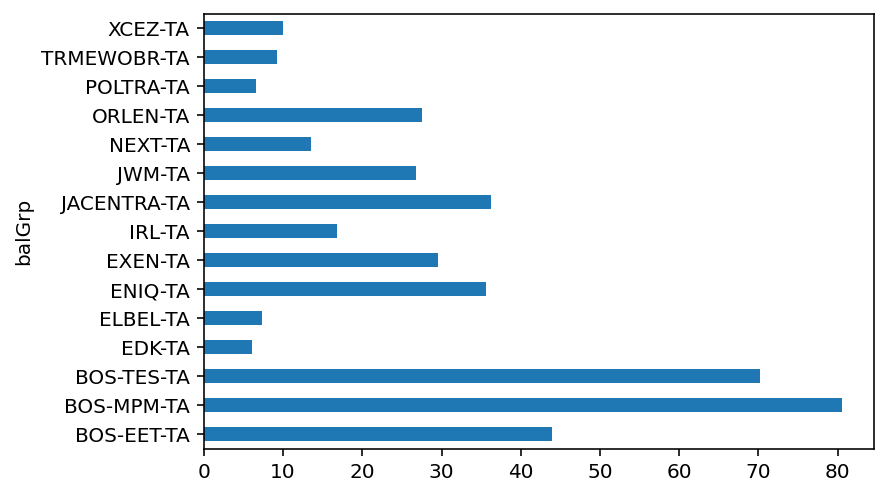

In [159]:
%config InlineBackend.figure_format = 'retina'
df.groupby("balGrp").mean()["ordrQty"].plot.barh();

<AxesSubplot:ylabel='ordrBuyCod'>

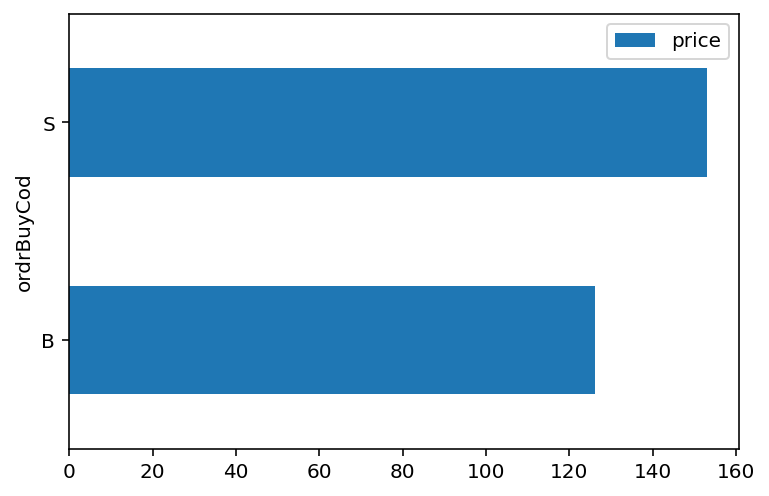

In [160]:
%config InlineBackend.figure_format = 'retina'

df.groupby("ordrBuyCod").agg({"price":"mean"}).plot.barh()

# Which traders are more active for TGE APP


In [170]:
data_for_activity_analysis_quantity = df.groupby("balGrp").agg({"ordrQty":"mean"})
data_for_activity_analysis_price = df.groupby("balGrp").agg({"price":"mean"})


In [171]:
data_for_activity_analysis_quantity['price'] = data_for_activity_analysis_price['price'] 

In [178]:
last_Version_analysis_data_set = data_for_activity_analysis_quantity

In [186]:
last_Version_analysis_data_set['ordrQty'] = last_Version_analysis_data_set['ordrQty']+0.01

In [180]:
last_Version_analysis_data_set['price'] = last_Version_analysis_data_set['price']+0.01

In [188]:
standardized = last_Version_analysis_data_set.apply(lambda x: (x-min(x))/(max(x)-min(x)))


In [190]:
standardized['ordrQty'] = standardized['ordrQty']+0.01
standardized['price'] = standardized['price']+0.01


In [191]:
standardized

,ordrQty,price
balGrp,,
BOS-EET-TA,0.518076,0.637909
BOS-MPM-TA,1.010000,0.089604
BOS-TES-TA,0.871684,0.133296
EDK-TA,0.010000,0.763092
ELBEL-TA,0.026428,0.531580
ENIQ-TA,0.406599,0.541769
EXEN-TA,0.324905,0.010000
IRL-TA,0.154229,0.963590
JACENTRA-TA,0.414563,0.083552


# Scoring the users

In [204]:
score = standardized['ordrQty'] * standardized['price']

In [207]:
score.sort_values(ascending=False)

balGrp
BOS-EET-TA     0.330485
ORLEN-TA       0.231585
ENIQ-TA        0.220283
IRL-TA         0.148614
BOS-TES-TA     0.116192
NEXT-TA        0.110693
JWM-TA         0.103666
BOS-MPM-TA     0.090500
JACENTRA-TA    0.034638
POLTRA-TA      0.015004
ELBEL-TA       0.014048
TRMEWOBR-TA    0.010813
EDK-TA         0.007631
XCEZ-TA        0.004362
EXEN-TA        0.003249
dtype: float64

In [206]:
standardized['score'] = score

# Segmentation of TGE traders

In [209]:
standardized["segment"] = np.where(standardized["score"] >= score.median()+ score.std()/len(score),"A","B")


In [210]:
standardized

,ordrQty,price,score,segment
balGrp,,,,
BOS-EET-TA,0.518076,0.637909,0.330485,A
BOS-MPM-TA,1.010000,0.089604,0.090500,B
BOS-TES-TA,0.871684,0.133296,0.116192,A
EDK-TA,0.010000,0.763092,0.007631,B
ELBEL-TA,0.026428,0.531580,0.014048,B
ENIQ-TA,0.406599,0.541769,0.220283,A
EXEN-TA,0.324905,0.010000,0.003249,B
IRL-TA,0.154229,0.963590,0.148614,A
JACENTRA-TA,0.414563,0.083552,0.034638,B


In [1]:
jupyter nbconvert --to html TGE_analytics.ipynb

SyntaxError: invalid syntax (<ipython-input-1-7f24a6f02488>, line 1)